In [1]:
import numpy as np
import importlib
from models.utils import dataloader as loader
from models.curvefit import curvefit_models as models
from models.curvefit import curvefit_pipeline as p
import matplotlib.pyplot as plt
import datetime as dt
import pickle
importlib.reload(p)
importlib.reload(loader)
importlib.reload(models)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'models.curvefit.curvefit_models' from 'C:\\Users\\kehua\\Documents\\Caltech\\CS156-COVID19\\models\\curvefit\\curvefit_models.py'>

### Final model code demo

This code generates the submission file used for the final submission.

Running our code simply specifies some parameters and calls some very high level functions. Please see the curvefit module (models/curvefit) for all information on implementation details.

The code should run in any Python 3.6+ environment with the correct dependencies installed. 

Runtime estimate: ~3 hours (This was with Theano configured to use GPU and with an actual (non numpy) OpenBLAS installation. Unsure about effect of GPU, but this is MUCH slower without OpenBLAS)

The Guassian Process step can be elimated by setting 'use_gp' to None in model_params. This has almost no impact on RMSE, and only a relatively small albeit noticeable pinball loss penalty. However, this makes the entire training take only about 3 minutes. Furthermore, the Gaussian process step can be enabled for only a subset of counties by passing a list of county indices (not FIPS! use utils.dataloader.get_index_from_fips to convert) for 'use_gp', which can greatly speed up training depending on how few counties the GP step applies to.

In [2]:
data_format = {'name': 'deaths_raw', 'smoothing': 3, 'val_steps': 10}
gp_params = {'draw': 150, 'tune': 300, 'samples': 100, 'trials': 3}
use_gp = None
model_params = {'name': 'ExpNormModel', 'use_gp': use_gp, 'gp_params': gp_params}
horizon = 14
samples = 250
quantiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]

today = dt.date.today()
output_file = f'predictions/predictions-{str(today)}.csv'
sample_file = 'sample_submission.csv'

In [3]:
# Do a blind run to generate the use_cumulative dict based on 10 validation steps
init_pipeline = p.Pipeline(data_format, model_params, horizon)
init_pipeline.run()
use_c = init_pipeline.use_cumulative

C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [8]:
data_format['val_steps'] = 0
# We just chose some high-death counties here as an example. In the actual submission, we used 'all', but training takes very long
model_params['use_gp'] = [204, 309, 246, 2289, 1782, 1225, 1312, 610]

In [9]:
pipeline = p.Pipeline(data_format, model_params, horizon, use_c)

In [10]:
pipeline.run()

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████████████████| 450/450 [00:03<00:00, 137.29it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
The acceptance probability does not match the target. It is 0.8858179080857868, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple se

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|██████████████████████████████████████████████████████████| 450/450 [00:04<00:00, 94.97it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
The acceptance probability does not match the target. It is 0.8821550317966786, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8916307169911931, but should be close to 0.8. Try to increase the number of tuning s

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████████████████| 450/450 [00:03<00:00, 119.35it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████████████████| 450/450 [00:03<00:00, 124.58it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
The acceptance probability does not match the target. It is 0.8847807829337758, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smalle

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████████████████| 450/450 [00:03<00:00, 127.31it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
The acceptance probability does not match the target. It is 0.8956176619962843, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smalle

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████████████████| 450/450 [00:03<00:00, 118.64it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
The acceptance probability does not match the target. It is 0.8868553358610615, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smalle

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████████████████| 450/450 [00:04<00:00, 107.58it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, η, ρ]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████████████████████| 450/450 [00:03<00:00, 134.53it/s]
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller

Fitting 3142/3142


In [11]:
pipeline.predict(quantiles=quantiles, samples=samples)

In [ ]:
pipeline.write_to_file(output_file, sample_file, quantiles)

### Prediction Visualization

In [12]:
pred = pipeline.get_combined_predictions(quantiles=quantiles, samples=250)

Text(0.5, 1.0, 'Daily Deaths for county 36061')

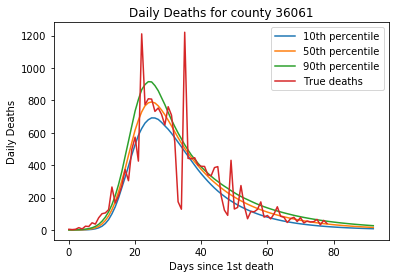

In [15]:
# Replace fips with any county you want to visualize the predictions for
fips = '36061'
county = loader.get_index_from_fips(fips)
x = np.arange(pred[county].shape[0])
y = pred[county][:, 0]
plt.plot(x, y, label='10th percentile')

y = pred[county][:, 4]
plt.plot(x, y, label='50th percentile')

y = pred[county][:, 8]
plt.plot(x, y, label='90th percentile')

y = pipeline.data.daily_change[county]
x = np.arange(y.shape[0])
plt.plot(x, y, label='True deaths')

plt.legend()
plt.xlabel('Days since 1st death')
plt.ylabel('Daily Deaths')
plt.title(f'Daily Deaths for county {fips}')

### Unincorporated model demo

This is a demo of the unincoporated cases-deaths GP model as described in the report. This is not included in the final submission. 

Note that this takes very long to run, ~12 hours

In [16]:
import importlib
from models.utils import dataloader as loader
from models.gaussianprocess import gp_pipeline as gpp
from models.gaussianprocess import gp_model as m
from models.utils import clustering as c
import matplotlib.pyplot as plt
import numpy as np

importlib.reload(m)
importlib.reload(loader)
importlib.reload(gpp)

<module 'models.gaussianprocess.gp_pipeline' from 'C:\\Users\\kehua\\Documents\\Caltech\\CS156-COVID19\\models\\gaussianprocess\\gp_pipeline.py'>

In [17]:
data_format = {'name': 'cases_raw', 'smoothing': 3, 'val_steps': 10}
use_gp = None
model_params = {'name': 'ExpNormModel', 'use_gp': use_gp, 'gp_params': {}}
horizon = 14
samples = 250
quantiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]

init_pipeline = p.Pipeline(data_format, model_params, horizon)
init_pipeline.run()
use_c = init_pipeline.use_cumulative
data_format['val_steps'] = 0

cases_pipeline = p.Pipeline(data_format, model_params, horizon, use_c)
cases_pipeline.run()
cases_pipeline.predict()
cases_pred = cases_pipeline.predictions

C:\Users\kehua\AppData\Local\Programs\Python\python-venv\37_env\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


ValueError: array must not contain infs or NaNs

In [ ]:
gp_pipeline = gpp.Pipeline({}, {}, val_steps=0)

In [ ]:
gp_pipeline.run(folder='gp_cluster_demo')

In [ ]:
gp_pipeline.extend_cases_smooth(cases_pred)
predictions = gp_pipeline.predict(horizon)